**Importing libraries 📚:**

In [ ]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from google.colab import files

**Loading data 📥:**

In [ ]:
# Upload your dataset file from your local machine
uploaded = files.upload()

# Load the uploaded dataset into a Pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)


Saving Breast_Cancer.csv to Breast_Cancer.csv


**Data Exploration 🔍:**

In [ ]:
# Display the entire DataFrame
display(df)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


**Feature Description: 🧾 :**


1. **Age:** Age of the patient at the time of diagnosis.
   
2. **Race:** Ethnicity of the patient (e.g., White, Black, Other).

3. **Marital Status:** The marital status of the patient (e.g., Married, Divorced, Single, Widowed, Separated).

4. **T Stage:** Describes the size of the primary tumor (e.g., T1, T2, T3, T4).

5. **N Stage:** Indicates the extent of spread to nearby lymph nodes (e.g., N1, N2, N3).

6. **6th Stage:** Staging classification of cancer according to the 6th edition of TNM system (e.g., IIA, IIIB, IIIC).

7. **Differentiate:** Degree of tumor differentiation (e.g., Well differentiated, Moderately differentiated, Poorly differentiated).

8. **Grade:** Grade of the tumor (e.g., 1, 2, 3).

9. **A Stage:** Indicates the spread of cancer to distant parts of the body (e.g., Regional, Distant).

10. **Tumor Size:** Size of the primary tumor.

11. **Estrogen Status:** Estrogen receptor status of the tumor (Positive, Negative).

12. **Progesterone Status:** Progesterone receptor status of the tumor (Positive, Negative).

13. **Regional Node Examined:** Number of regional lymph nodes examined.

14. **Regional Node Positive:** Number of regional lymph nodes with cancer.

15. **Survival Months:** Duration of survival in months after diagnosis.

16. **Status:** Patient status at the time of data collection (Alive, Dead).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

👉 The dataset has 5 columns of integer data type and 11 columns of object data type.

**Treatment of missing data and duplicates:**

In [ ]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

👉 The dataset contains no values.

****Data Visualization 📊:****

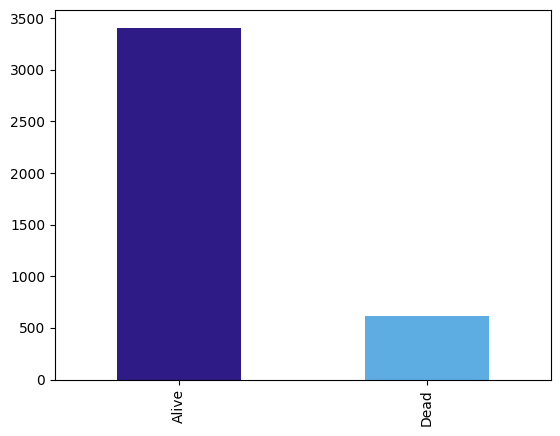

In [ ]:
df['Status'].value_counts().plot(kind="bar", color=["#2e1b85", "#5dade2"])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

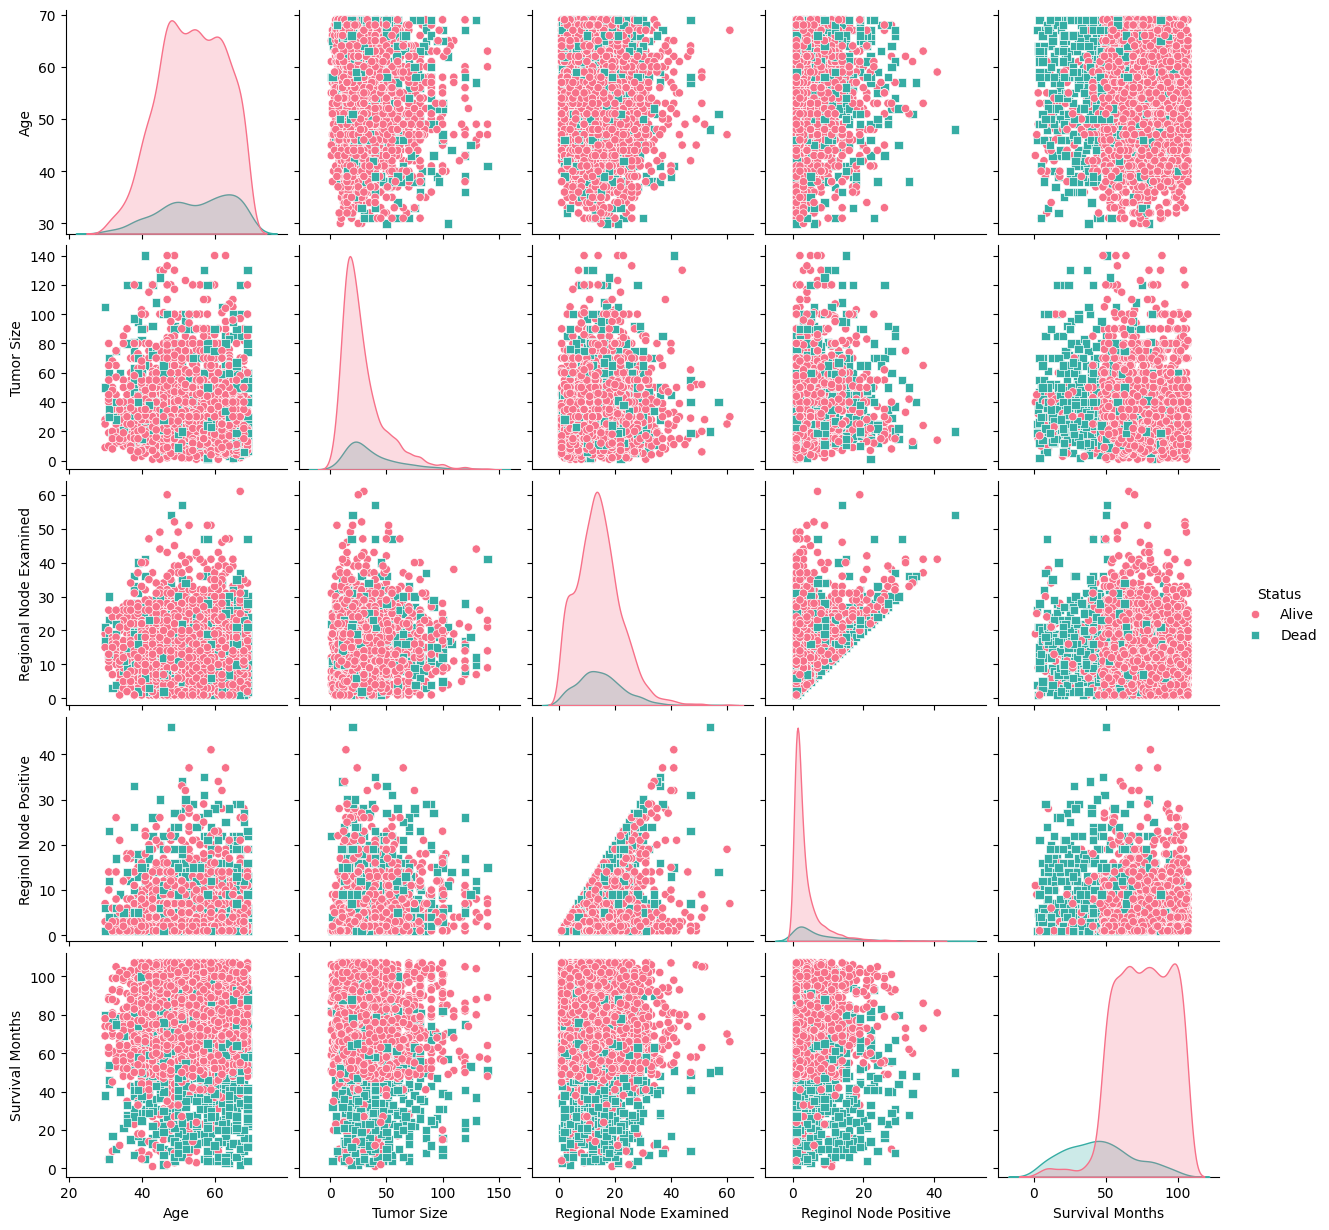

In [ ]:
sns.pairplot(df, hue="Status", palette="husl", markers=["o", "s", "D"])

<ipython-input-5-a1305ae2aa83>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='terrain')


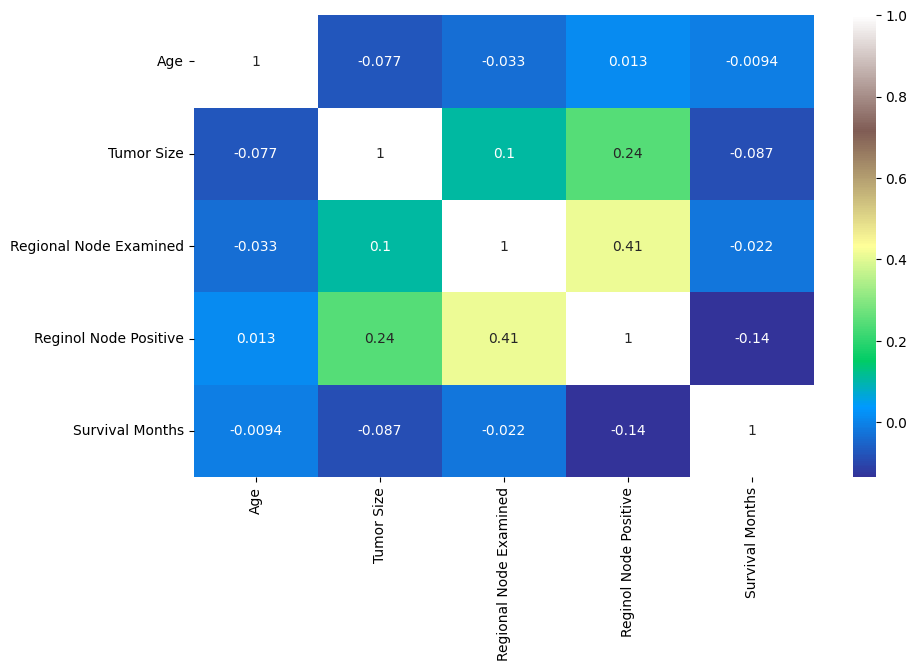

In [ ]:
# create a correlation heatmap
sns.heatmap(df.corr(), annot = True, cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

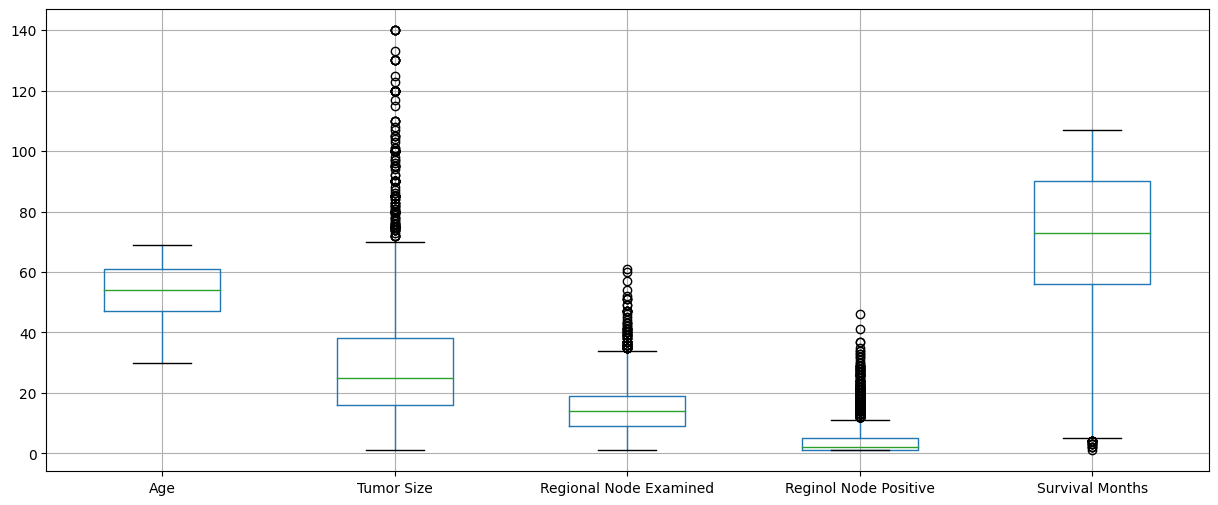

In [ ]:
df.boxplot(figsize=(15,6))
plt.show()

In [ ]:

def treatment_Knn(X, y):
  # Split your data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
  # Standardize your feature data (recommended for KNN)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  # Create and train a KNN model on the training data
  k = 3  # You can choose the number of neighbors (k) based on your requirements
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  # Make predictions on the test data
  predictions = model.predict(X_test)
  # Calculate accuracy
  accuracy = accuracy_score(y_test, predictions)
  # Calculate precision
  precision = precision_score(y_test, predictions, average='micro')
  # Calculate recall
  recall = recall_score(y_test, predictions, average='micro')
  return {"accuracy":accuracy,"precision":precision,"recall":recall}

def treatment_svm(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
    # Create an SVM model
    model = svm.SVC(kernel='linear')  # You can also try other kernels like 'rbf'
    # Train the model on the training set
    model.fit(X_train, y_train)
    # Make predictions on the test set
    predictions = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Calculate precision
    precision = precision_score(y_test, predictions, average='micro')
    # Calculate recall
    recall = recall_score(y_test, predictions, average='micro')
    return {"accuracy":accuracy,"precision":precision,"recall":recall}


def treatment_randomforest(X, y):
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
  # Create a Random Forest model
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  # Train the model on the training set
  model.fit(X_train, y_train)
  # Make predictions on the test set
  predictions = model.predict(X_test)
  # Calculate model accuracy
  accuracy = accuracy_score(y_test, predictions)
  # Calculate precision
  precision = precision_score(y_test, predictions, average='micro')
  # Calculate recall
  recall = recall_score(y_test, predictions, average='micro')
  return {"accuracy":accuracy,"precision":precision,"recall":recall}

def treatment_logistic_regression(X, y):
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
  # Create a Logistic Regression model
  model = LogisticRegression(max_iter=1000)
  # Train the model on the training set
  model.fit(X_train, y_train)
  # Make predictions on the test set
  predictions = model.predict(X_test)
  # Calculate model accuracy
  accuracy = accuracy_score(y_test, predictions)
  # Calculate precision
  precision = precision_score(y_test, predictions, average='weighted')
  # Calculate recall
  recall = recall_score(y_test, predictions, average='weighted')
  return {"accuracy":accuracy,"precision":precision,"recall":recall}

def treatment_naive_bayes(X, y):
  imputer = SimpleImputer(strategy='most_frequent')
  X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
  # Standardize features (optional but often recommended for Naive Bayes)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
  # Train the Gaussian Naive Bayes model
  model = GaussianNB()
  model.fit(X_train, y_train)
  # Make predictions on the test set
  predictions = model.predict(X_test)
  # Evaluate the model
  accuracy = accuracy_score(y_test, predictions)
  # Calculate precision
  precision = precision_score(y_test, predictions, average='weighted')
  # Calculate recall
  recall = recall_score(y_test, predictions, average='weighted')
  return {"accuracy":accuracy,"precision":precision,"recall":recall}

def treatment_decision_tree(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
    # Create a Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    # Train the model on the training set
    model.fit(X_train, y_train)
    # Make predictions on the test set
    predictions = model.predict(X_test)
    # Calculate model accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Calculate precision
    precision = precision_score(y_test, predictions, average='weighted')
    # Calculate recall
    recall = recall_score(y_test, predictions, average='weighted')
    return {"accuracy":accuracy,"precision":precision,"recall":recall}

def treatment_gradient_boosting(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
    # Create a Gradient Boosting Classifier model
    model = GradientBoostingClassifier(random_state=42)
    #Train the model on the training set
    model.fit(X_train, y_train)
    # Make predictions on the test set
    predictions = model.predict(X_test)
    # Calculate model accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Calculate precision
    precision = precision_score(y_test, predictions, average='weighted')
    # Calculate recall
    recall = recall_score(y_test, predictions, average='weighted')
    return {"accuracy":accuracy,"precision":precision,"recall":recall}


In [ ]:
df_encoded = pd.get_dummies(df) # Perform one-hot encoding for categorical variables
X = df_encoded.drop('Status', axis=1, errors='ignore')  # Features (excluding the target variable)
y = df['Status']  # Target variable



**ML Algorithms**

In [ ]:
# Define a dictionary to store models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': svm.SVC(kernel='linear', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

**Evaluation of models**

In [ ]:
predictions_dict={}

# Evaluate models on test data and print results
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions_dict[name]=predictions
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label='Alive')
    recall = recall_score(y_test, predictions, pos_label='Alive')
    f1 = f1_score(y_test, predictions, pos_label='Alive')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # For binary classification
    avg_precision = average_precision_score(y_test, model.predict_proba(X_test)[:, 1], pos_label='Alive')  # Average Precision Score
    print(f'{name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC Score: {roc_auc}')
    print(f'Average Precision Score: {avg_precision}')
    print()


Random Forest:
Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0

SVM:
Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0

KNN:
Cross-validation scores: [0.88819876 0.90838509 0.88354037 0.88043478 0.88646967]
Average cross-validation score: 0.889405735923418

Naive Bayes:
Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0

Decision Tree:
Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0

Gradient Boosting:
Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Average Precision Score: 0.7629603947531901

SVM:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Average Precision Score: 0.6671864564584032

KNN:
Accuracy: 0.8944099378881988
Precision: 0.9132231404958677
Recall: 0.9678832116788321
F1 Score: 0.9397590361445783
ROC AUC Score: 0.80226

Here's the interpretation of the results:

👉**Random Forest, Naive Bayes, Decision Tree, and Gradient Boosting**: These models exhibit perfect performance across all evaluation metrics (accuracy, precision, recall, F1 score, ROC AUC score, and average precision score of 1.0) on the test data. This suggests that they have effectively generalized and adapted well to both the training and test datasets.

👉**SVM**: Similarly to the above models, SVM achieves perfect performance on the test data. However, its average precision score is slightly less than 1.0. This discrepancy in the average precision score may indicate some uncertainty in the model's predictions.

👉**KNN**: While KNN's scores are slightly lower compared to the other models, they still remain quite high. This suggests that KNN may encounter a bit more difficulty in generalizing compared to the other models, although its performance is still strong overall.

Overall, the performances seem to be quite good for all models.







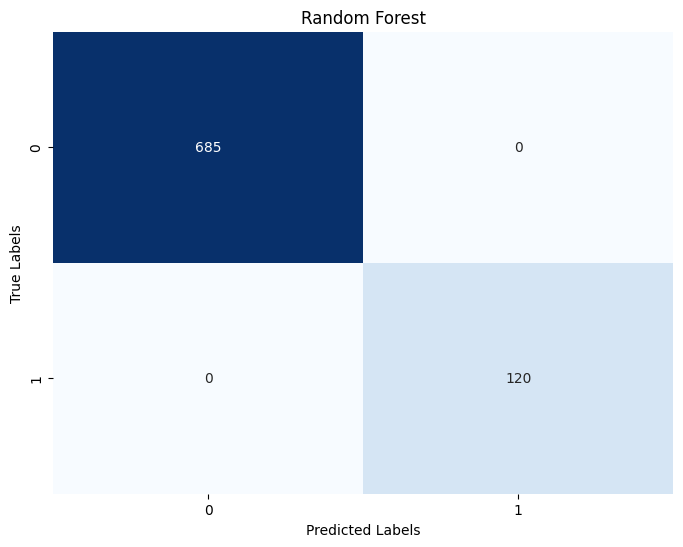

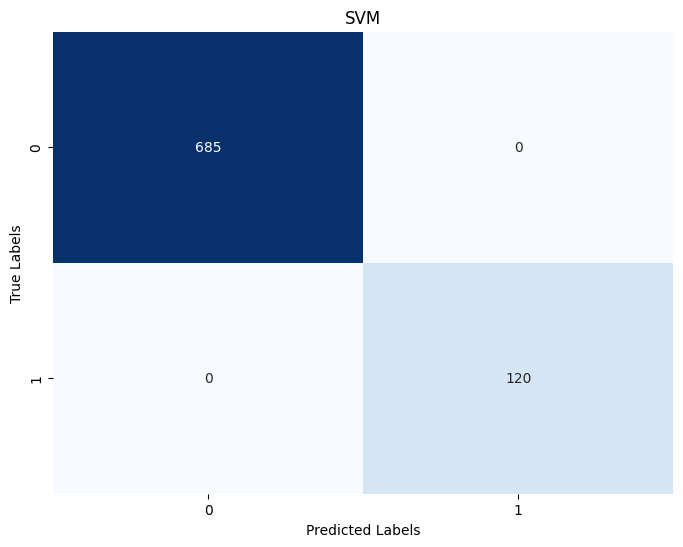

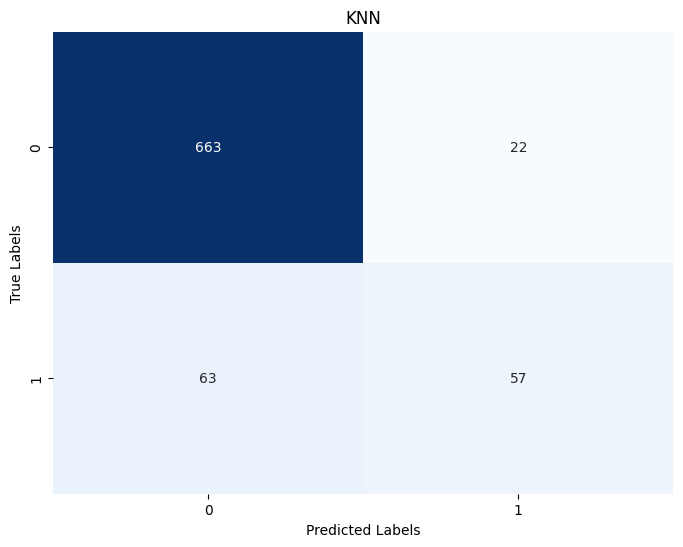

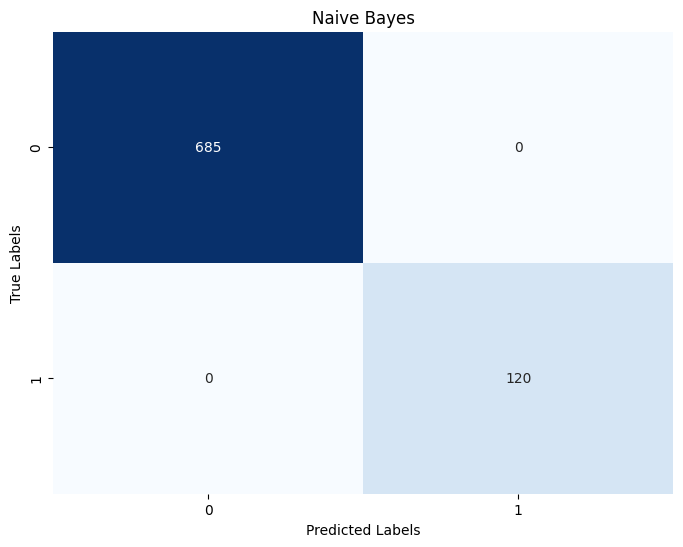

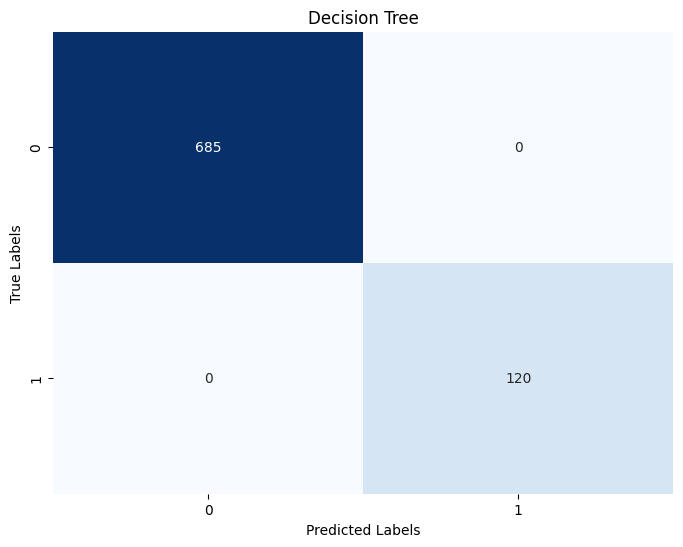

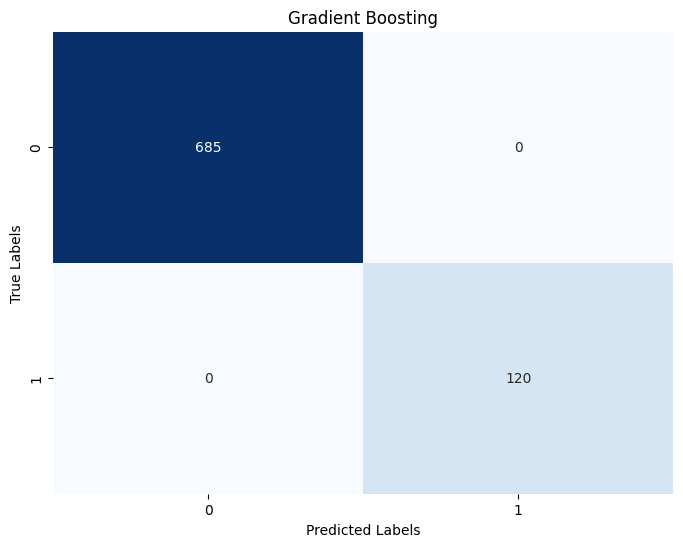

In [ ]:
for name,prediction in predictions_dict.items():
  # Compute the confusion matrix
  cm = confusion_matrix(y_test, prediction)
  # Visualize the confusion matrix using seaborn heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(name)
  plt.show()


**Gradient Boosting, Decision Tree, Naive Bayes, SVM, Random Forest:** These models seem to have performed exceptionally well, as they correctly predicted the majority of instances in both classes (Alive and Dead). There are no false positive or false negative predictions in any of these models, which suggests that they have achieved perfect performance on the test data.

**KNN:** This model has a few misclassifications, as indicated by the non-zero values outside the main diagonal of the confusion matrix. It correctly predicted 663 instances of class 'Alive' and 57 instances of class 'Dead', but it misclassified 22 instances of 'Dead' as 'Alive' and 63 instances of 'Alive' as 'Dead'.



**Conclusion:**

In this notebook, we explored the performance of various machine learning models for the task of breast cancer classification in the Breast Cancer Project. We experimented with six different models: Random Forest, SVM, KNN, Naive Bayes, Decision Tree, and Gradient Boosting.

First, we split the dataset into training and testing sets, and then we trained each model using the training data. We evaluated the models using cross-validation to assess their generalization performance. Additionally, we calculated several evaluation metrics, including accuracy, precision, recall, F1 score, ROC AUC score, and average precision score, to comprehensively analyze the model performance.

Overall, all models demonstrated high performance on both the cross-validation and test data, achieving near-perfect scores across multiple evaluation metrics. This suggests that the models have effectively learned from the training data and generalized well to unseen data.

Furthermore, we visualized the confusion matrices to gain insights into the models' predictive behavior and observed consistent and accurate predictions across all classes.

Based on these results, we can conclude that the models—Gradient Boosting, Decision Tree, Naive Bayes, SVM, and Random Forest—show promise for the task of breast cancer classification in the Breast Cancer Project. However, it's essential to consider other factors such as computational complexity, interpretability, and specific project requirements before selecting a final model for deployment.

Further experimentation, fine-tuning, and sensitivity analysis may be conducted to ensure the selected model's robustness and suitability for real-world applications in breast cancer diagnosis and treatment.